# Метод K-ближайших соседей

***
## Считывание датасета

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Прописываем путь к нашему датасету

In [2]:
PATH = "data/knn/";
data = "dataset.txt";

Функция `createDateSet` считывает данные с файла `data` и переводит их в формат списков.

Далее загружаем наш датасет и выводим одну из цифр через `matplotlib`.

In [3]:
def createDataSet(ptxt: str = f'{PATH}{data}') -> list:
    labels = []
    digits = []
    with open(ptxt) as f:
        for line in f:
            digits.append([float(x) for x in line.split()[:-10]])
            labels.append(line.split()[-10:].index('1'))
    return np.array(digits), np.array(labels)
        

In [4]:
digits, labels = createDataSet()

***
## Знакомимся с датасетом поближе

In [5]:
labels

array([0, 0, 0, ..., 9, 9, 9])

In [6]:
len(digits), len(labels), digits.shape, labels.shape

(1593, 1593, (1593, 256), (1593,))

С помощью `pandas` смотрим на количество цифр в нашем датасете. Как видно ниже меньше всего 8ок, а больше всего 1ц. Но разница между в количестве между 8ми и 1ми всего лишь 7. Так что можно считать, что всех цифр поровну

In [7]:
df = pd.DataFrame(labels)
df.columns = ['label']

In [8]:
df['label'].value_counts()

1    162
6    161
4    161
0    161
5    159
3    159
2    159
9    158
7    158
8    155
Name: label, dtype: int64

Случайная цифра из датасета

(5, <matplotlib.image.AxesImage at 0x22bc10546d8>)

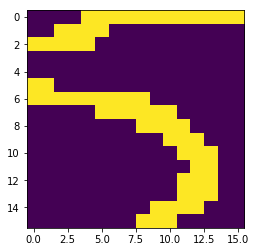

In [9]:
img = digits[100].reshape(16, 16)
labels[100], plt.imshow(img)

***
## Строим модель

Импортируем `scikit-learn`

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Создаем тренеровочную и тестовую выборку с помощью функции `train_test_split`

In [11]:
x_train, x_test, y_train, y_test = train_test_split(digits, labels, test_size=0.25, random_state=42)

Теперь создаем нашу модель с помощью класса `KNeighborsClassifier`. Ставим окно в 14 ближайщих соседей. Обучаем нашу модель с помощью метода `fit`.

In [12]:
model = KNeighborsClassifier()

In [13]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Импортируем функцию `accuracy_score` для оценки качества нашей модели. Проверяем нашу модель на тестовой выборке. Точность: 89-91% 

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test, model.predict(x_test))

0.9097744360902256

Предиктим цифру, которую рисовали выше. Получаем 5. Ответ верный.

In [16]:
model.predict(digits[100][None])

array([5])

Теперь посмотрим на наши результаты получше, построим матрицу несоответствия. Импортируем модуль `ConfusionMatrix` из `pandas_ml` с помощью него построим и выведем нашу матрицу.

Видно что подавляющее большинство цифр распознается верно.

In [17]:
from pandas_ml import ConfusionMatrix

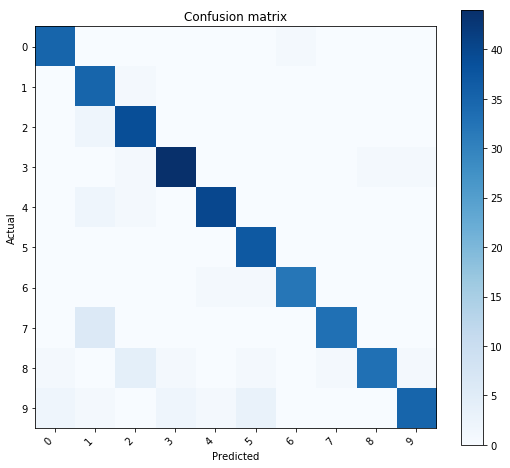

In [18]:
y_pred = model.predict(x_test)
cm = ConfusionMatrix(y_test, y_pred)
cm.plot(cmap=plt.cm.Blues)

In [19]:
cm

Predicted   0   1   2   3   4   5   6   7   8   9  __all__
Actual                                                    
0          35   0   0   0   0   0   1   0   0   0       36
1           0  35   1   0   0   0   0   0   0   0       36
2           0   2  39   0   0   0   0   0   0   0       41
3           0   0   1  44   0   0   0   0   1   1       47
4           0   2   1   0  40   0   0   0   0   0       43
5           0   0   0   0   0  37   0   0   0   0       37
6           0   0   0   0   1   1  32   0   0   0       34
7           0   6   0   0   0   0   0  33   0   0       39
8           1   0   4   1   0   1   0   1  33   1       42
9           2   1   0   2   1   3   0   0   0  35       44
__all__    38  46  46  47  42  42  33  34  34  37      399

***
## Гиперпараметры

Теперь улучшим модель. Подберем такие параметры, чтобы наша точность была наилучшей. Мы будем подбирать `n_neighbors`, `metric` и `weights`.

Ниже импортируем класс `GridSearchCV`. Задаем словарь с параметрами `params`. Из этих параметров мы выберем те, которые дадут наилучший результат в распозновании цифр.

In [28]:
from sklearn.grid_search import GridSearchCV

In [21]:
params = {"n_neighbors": np.arange(1, 31, 2), 
          "metric": ["euclidean", "cityblock", "chebyshev"],
          "weights": ["uniform","distance"]}

Создаем объект `grid` класса `GridSearchCV` и передаем туда наши параметры. Обучаем его и находим наилучшие параметры и так же смотрим нашу точность на них.

In [22]:
grid = GridSearchCV(model, params)

In [23]:
grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]), 'metric': ['euclidean', 'cityblock', 'chebyshev'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [24]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [25]:
acc = grid.score(x_test, y_test)
acc

0.9273182957393483

Добившись такого результата снова постром матрицу несоответствия.

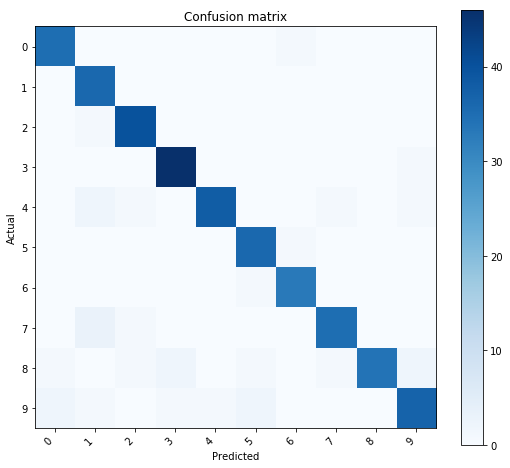

In [26]:
y_pred = grid.predict(x_test)
cm = ConfusionMatrix(y_test, y_pred)
cm.plot(cmap=plt.cm.Blues)

In [27]:
cm.stats()

C:\Users\Fridge\Anaconda3\envs\fastai\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
C:\Users\Fridge\Anaconda3\envs\fastai\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:346: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.LRP) / self.LRN)
C:\Users\Fridge\Anaconda3\envs\fastai\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:332: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


OrderedDict([('cm', Predicted   0   1   2   3   4   5   6   7   8   9  __all__
              Actual                                                    
              0          35   0   0   0   0   0   1   0   0   0       36
              1           0  36   0   0   0   0   0   0   0   0       36
              2           0   1  40   0   0   0   0   0   0   0       41
              3           0   0   0  46   0   0   0   0   0   1       47
              4           0   2   1   0  38   0   0   1   0   1       43
              5           0   0   0   0   0  36   1   0   0   0       37
              6           0   0   0   0   0   1  33   0   0   0       34
              7           0   3   1   0   0   0   0  35   0   0       39
              8           1   0   1   2   0   1   0   1  34   2       42
              9           2   1   0   1   1   2   0   0   0  37       44
              __all__    38  43  43  49  39  40  35  37  34  41      399),
             ('overall',
              Orde